# Assignment 3 Part 2
## Diffusion Model

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the autoreload extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
# Verify the AFHQ dataset is present
import os

data_path = './data/train'
if os.path.exists(data_path):
    print(" Dataset found!")
    print(f" Data structure:")
    for category in ['cat', 'dog', 'wild']:
        cat_path = os.path.join(data_path, category)
        if os.path.exists(cat_path):
            num_images = len([f for f in os.listdir(cat_path) if f.endswith(('.jpg', '.png'))])
            print(f"   - {category}: {num_images} images")
else:
    print("FAILED: Dataset not found at ./data/train")
    print("Please download the AFHQ dataset manually and place it in the ./data folder")

 Dataset found!
 Data structure:
   - cat: 5065 images
   - dog: 4678 images
   - wild: 4593 images


In [30]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/A3_PartB/  #Use correct path
# !pwd

In [31]:
# Set up the environment
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# # Download the dataset afhq_v2.zip (6.48G)
# !mkdir -p ./data
# !gdown --id 1-1npXlqCw1CYQ5SBbrlSgZdA9TEwZre4 -O ./data/afhq_v2.zip #Using gdown to get the data from Google Drive location
# !unzip -q ./data/afhq_v2.zip -d ./data

In [33]:
# # Download the dataset afhq_v2.zip (6.48G) - OR use the one provided in the data folder
# !mkdir data
# !curl -L -o data/afhq_v2.zip "https://www.dropbox.com/s/vkzjokiwof5h8w6/afhq_v2.zip?dl=1"
# !powershell -command "Expand-Archive -Path 'data/afhq_v2.zip' -DestinationPath 'data' -Force"

In [34]:
# Create validation set for FID computation
import os
from PIL import Image
from pathlib import Path

# Configuration
train_folder = './data/train'
val_folder = './data/val'
data_class = 'cat'
image_size = 32  # Match your training image size
num_val_images = 100  # Number of validation images

# Create validation folder
# os.makedirs(os.path.join(val_folder, data_class), exist_ok=True)
os.makedirs(os.path.join(val_folder), exist_ok=True) # Create the validation default folder for train implementation

# Get training images
train_images_path = os.path.join(train_folder, data_class)
train_images = os.listdir(train_images_path)

print(f"Found {len(train_images)} training images")
print(f"Creating validation set with {num_val_images} images...")

# Copy and resize first N images to validation folder
for idx, img_name in enumerate(train_images[:num_val_images]):
    if idx % 20 == 0:
        print(f"Processing {idx}/{num_val_images}...")
    
    # Load and resize image
    img_path = os.path.join(train_images_path, img_name)
    img = Image.open(img_path)
    img = img.resize((image_size, image_size))
    
    # Save to validation folder
    val_path = os.path.join(val_folder, img_name)
    img.save(val_path)

print(f"Validation set created at {val_folder}")
print(f"   Contains {len(os.listdir(os.path.join(val_folder)))} images")

Found 5065 training images
Creating validation set with 100 images...
Processing 0/100...
Processing 20/100...
Processing 40/100...
Processing 60/100...
Processing 80/100...
Validation set created at ./data/val
   Contains 100 images


In [35]:
!wandb online

W&B online. Running your script from this directory will now sync to the cloud.


In [36]:
# PART 1: Training - Live streaming output
import subprocess
import sys
import os

# Ensure we're in the correct directory  
script_dir = os.path.dirname(os.path.abspath("__file__"))  # Or use the actual path
os.chdir(script_dir)

process = subprocess.Popen(
    [sys.executable, '-u', 'main.py',
     '--data_path', './data/train',
     '--save_folder', './part1_train',
     '--data_class', 'cat',
     '--time_steps', '50',
     '--train_steps', '1000',
     '--image_size', '32',
     '--batch_size', '32',
     '--learning_rate', '1e-3',
     '--unet_dim', '16',
     '--save_and_sample_every', '100'
     ],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    encoding='utf-8',
    errors='replace'
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

return_code = process.wait()

if return_code == 0:
    print("\n Part 1 QUICK Training completed! Check wandb for loss curve")
else:
    print(f"\n Part 1 QUICK Training failed with error code: {return_code}")

Namespace(time_steps=50, train_steps=1000, save_folder='./part1_train', data_path='./data/train', load_path=None, data_class='cat', image_size=32, batch_size=32, learning_rate=0.001, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=False, save_and_sample_every=100, visualize=False)
wandb: Currently logged in as: dhairya28m (dhairya28m-nyu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in c:\--DPM-MAIN-DIR--\windsurf_projects\Variational-Autoencoder-and-Diffusion-Models-on-Animal-Faces-HQ-dataset__CVA_3\A3_PartB\A3_PartB\wandb\run-20251128_195906-76aywdew
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run part1_train
wandb:  View project at https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ
wandb:  View run at https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ/runs/76aywdew
d

Using run: part1_train (up7jf9fi)
Available metrics: ['_runtime', '_timestamp', 'loss', '_step']


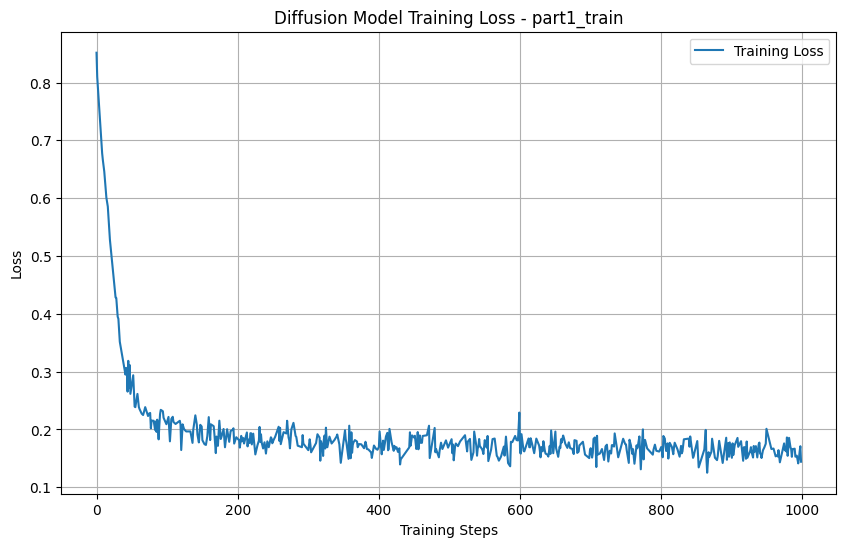

Loss plot saved as part1_training_loss.png


In [37]:
# PART 1: Plot Training Loss from Wandb
import wandb
import matplotlib.pyplot as plt

# Initialize API
api = wandb.Api()

# Option 1: Get specific run by ID
run_id = "up7jf9fi"  # Your latest run ID
run = api.run(f"dhairya28m-nyu/DDPM_AFHQ/{run_id}")

print(f"Using run: {run.name} ({run.id})")

# Get the history (all logged metrics)
history = run.history()

# Check what metrics are available
print(f"Available metrics: {history.columns.tolist()}")

# Plot the loss
if 'loss' in history.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(history['_step'], history['loss'], label='Training Loss')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title(f'Diffusion Model Training Loss - {run.name}')
    plt.legend()
    plt.grid(True)
    plt.savefig('part1_training_loss.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Loss plot saved as part1_training_loss.png")
else:
    print(" 'loss' metric not found in history")


Displaying individual samples from: part1_train\sample_ddpm_9


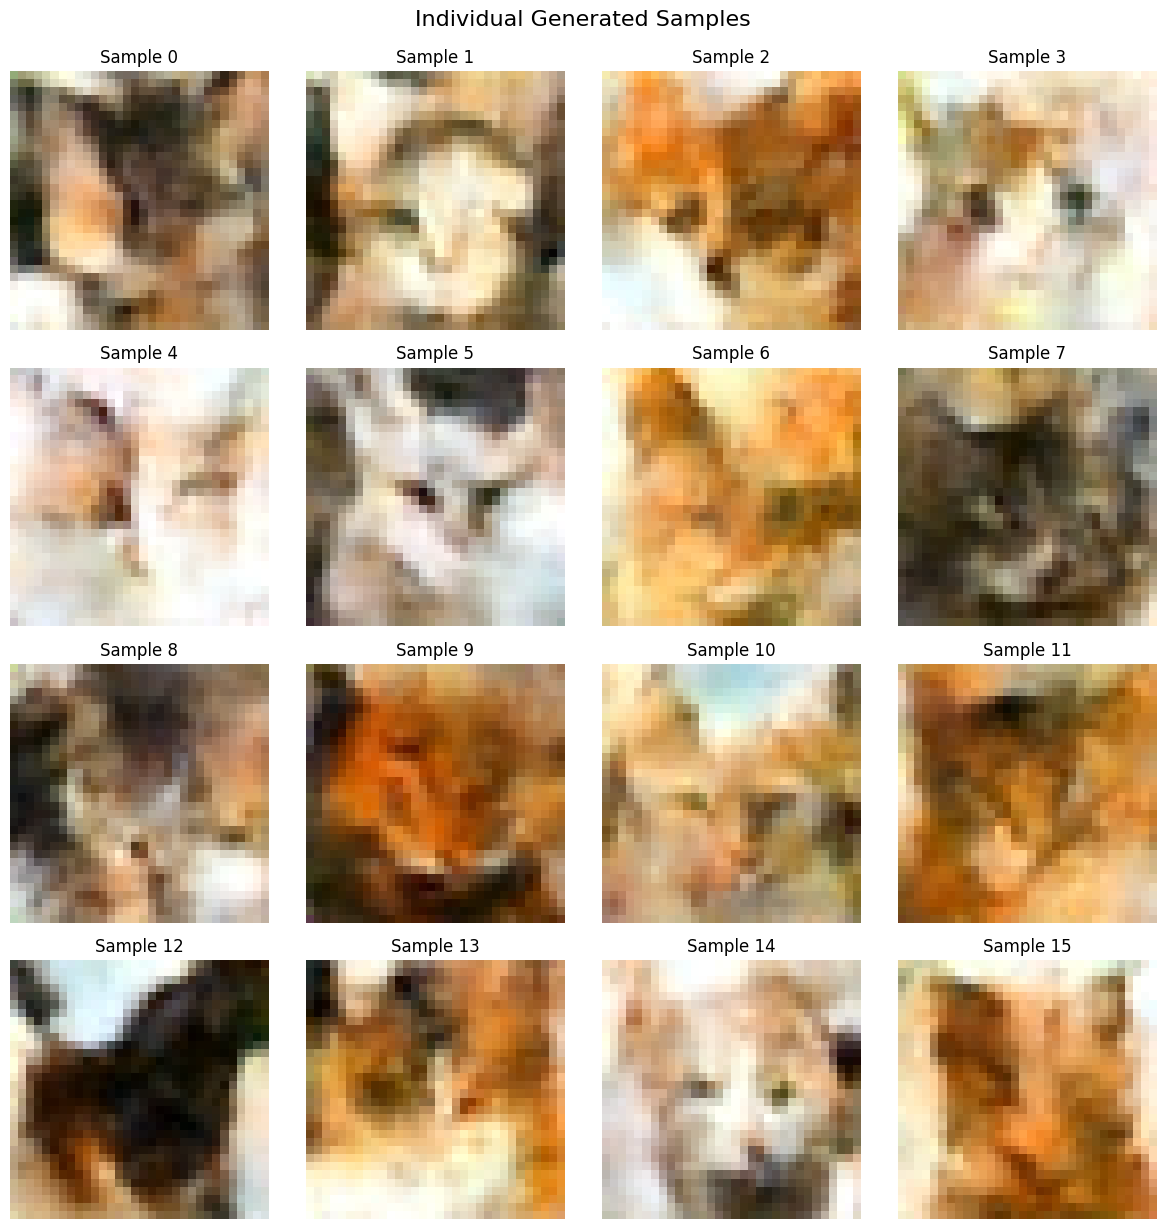

In [38]:
# Display generated samples from the test run
import matplotlib.pyplot as plt
from PIL import Image
import os
from pathlib import Path

# Find the results folder
results_folder = Path('./part1_train')

# Look for sample images
sample_files = []

# Check for grid samples (sample-*.png)
grid_samples = list(results_folder.glob('sample-*.png'))

# Check for individual samples in sample_ddpm folders
sample_ddpm_folders = list(results_folder.glob('sample_ddpm_*'))

if grid_samples:
    # Display the latest grid sample
    latest_grid = max(grid_samples, key=lambda x: x.stat().st_mtime)
    print(f"Displaying grid sample: {latest_grid}")
    
    img = Image.open(latest_grid)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Generated Samples Grid')
    plt.tight_layout()
    plt.show()

if sample_ddpm_folders:
    # Display individual samples from the latest folder
    latest_folder = max(sample_ddpm_folders, key=lambda x: x.stat().st_mtime)
    individual_samples = list(latest_folder.glob('*.png'))[:16]  # Show first 16
    
    if individual_samples:
        print(f"\nDisplaying individual samples from: {latest_folder}")
        
        fig, axes = plt.subplots(4, 4, figsize=(12, 12))
        axes = axes.flatten()
        
        for idx, sample_path in enumerate(individual_samples):
            img = Image.open(sample_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f'Sample {idx}')
        
        plt.tight_layout()
        plt.suptitle('Individual Generated Samples', y=1.02, fontsize=16)
        plt.show()

if not grid_samples and not sample_ddpm_folders:
    print("No sample images found in ./quicktest1")
    print("Available files:", list(results_folder.iterdir()))

In [39]:
# PART 2: TRAIN WITH FID Tracking
import subprocess
import sys

process = subprocess.Popen(
    [sys.executable, '-u', 'main.py',
     '--data_path', './data/train',
     '--save_folder', './part2_train_with_fid',
     '--data_class', 'cat',
     '--time_steps', '50',
     '--train_steps', '1000',
     '--image_size', '32',
     '--batch_size', '32',
     '--learning_rate', '1e-3',
     '--unet_dim', '16',
     '--save_and_sample_every', '100',
     '--fid' # Enable FID
     ],  
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    encoding='utf-8',
    errors='replace'
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

return_code = process.wait()
print(f"\n{'Pass: ' if return_code == 0 else 'Fail: '} Part 2 Training with FID completed")

Namespace(time_steps=50, train_steps=1000, save_folder='./part2_train_with_fid', data_path='./data/train', load_path=None, data_class='cat', image_size=32, batch_size=32, learning_rate=0.001, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=True, save_and_sample_every=100, visualize=False)
wandb: Currently logged in as: dhairya28m (dhairya28m-nyu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in c:\--DPM-MAIN-DIR--\windsurf_projects\Variational-Autoencoder-and-Diffusion-Models-on-Animal-Faces-HQ-dataset__CVA_3\A3_PartB\A3_PartB\wandb\run-20251128_200834-fkohhemr
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run part2_train_with_fid
wandb:  View project at https://wandb.ai/dhairya28m-nyu/DDPM_AFHQ
wandb:  View run at https://wandb.ai/dhairya28m-nyu/DDPM_AFH

Using run: part2_train_with_fid (vg4st8y1)
Available metrics: ['_step', '_runtime', '_timestamp', 'fid', 'loss']
 FID scores found: 7 measurements


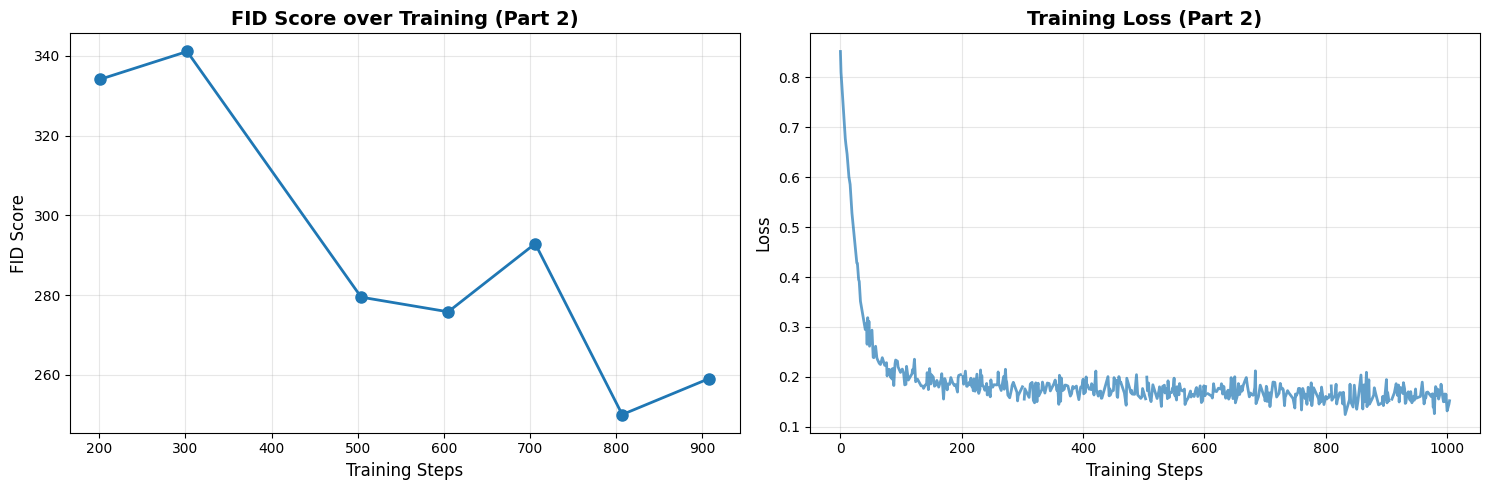

✅ Plot saved as part2_fid_and_loss.png


In [40]:
# Plot FID scores from Part 2
import wandb
import matplotlib.pyplot as plt

# Initialize API
api = wandb.Api()

# Get the specific Part 2 run
run = api.run("dhairya28m-nyu/DDPM_AFHQ/vg4st8y1")

print(f"Using run: {run.name} ({run.id})")

# Get the history
history = run.history()

print(f"Available metrics: {history.columns.tolist()}")

# Plot FID and Loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot FID
if 'fid' in history.columns:
    fid_data = history.dropna(subset=['fid'])
    ax1.plot(fid_data['_step'], fid_data['fid'], marker='o', linewidth=2, markersize=8)
    ax1.set_xlabel('Training Steps', fontsize=12)
    ax1.set_ylabel('FID Score', fontsize=12)
    ax1.set_title('FID Score over Training (Part 2)', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    print(f" FID scores found: {len(fid_data)} measurements")
else:
    print("'fid' metric not found")

# Plot Loss
if 'loss' in history.columns:
    ax2.plot(history['_step'], history['loss'], linewidth=2, alpha=0.7)
    ax2.set_xlabel('Training Steps', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.set_title('Training Loss (Part 2)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('part2_fid_and_loss.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Plot saved as part2_fid_and_loss.png")

🚀 Running Parts 3 & 4 with trained model...
Namespace(time_steps=50, train_steps=50000, save_folder='./part3_part4_submission', data_path='./data/train', load_path='./part2_train_with_fid/model.pt', data_class='cat', image_size=32, batch_size=16, learning_rate=2e-05, unet_dim=16, unet_dim_mults=[1, 2, 4, 8], fid=False, save_and_sample_every=1000, visualize=True)
wandb: Currently logged in as: dhairya28m (dhairya28m-nyu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.
wandb: setting up run cwa9625x
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in c:\--DPM-MAIN-DIR--\windsurf_projects\Variational-Autoencoder-and-Diffusion-Models-on-Animal-Faces-HQ-dataset__CVA_3\A3_PartB\A3_PartB\wandb\run-20251128_202131-cwa9625x
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run part3_part4_submission
wandb:  View pro

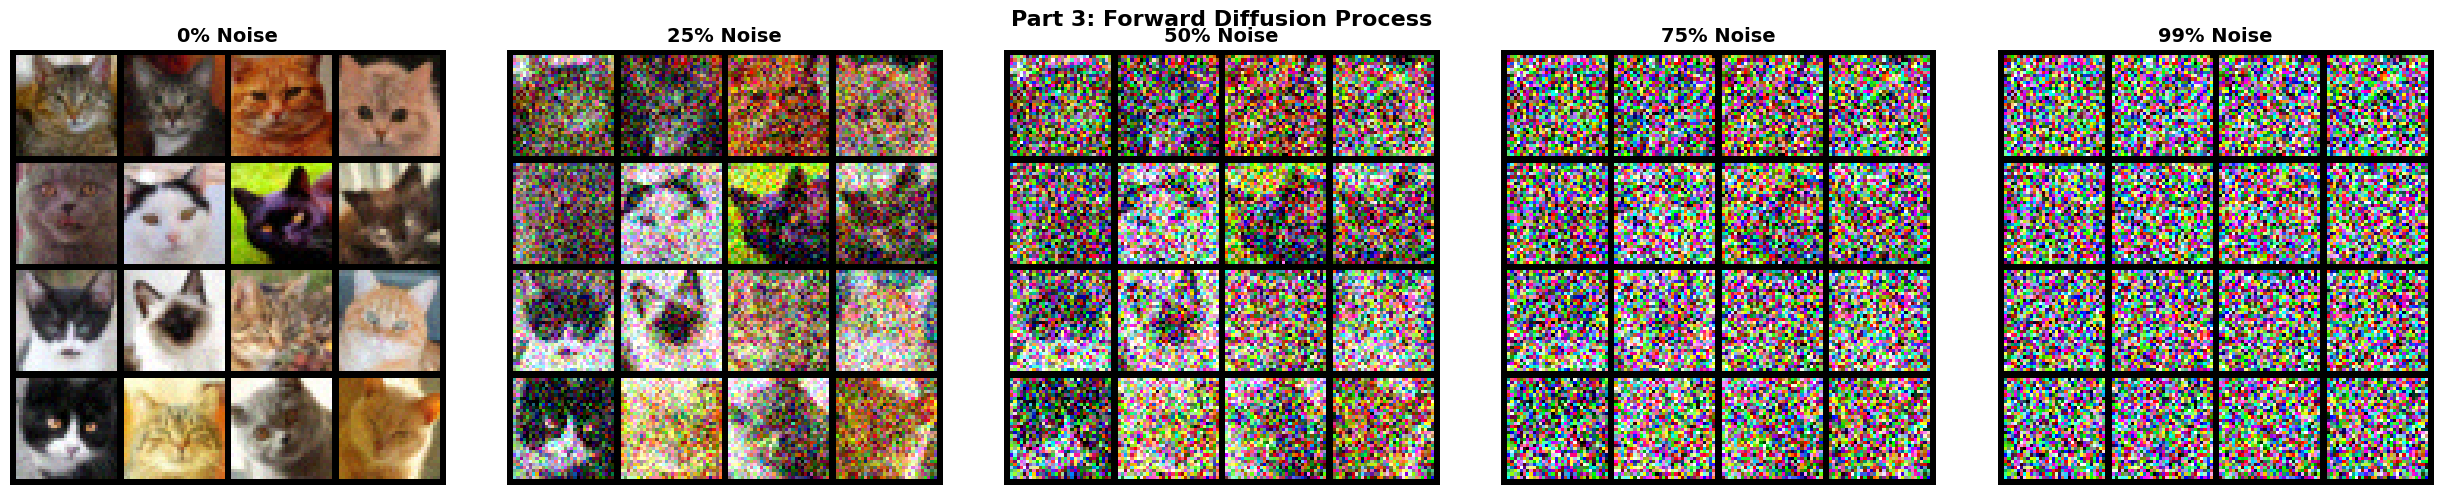

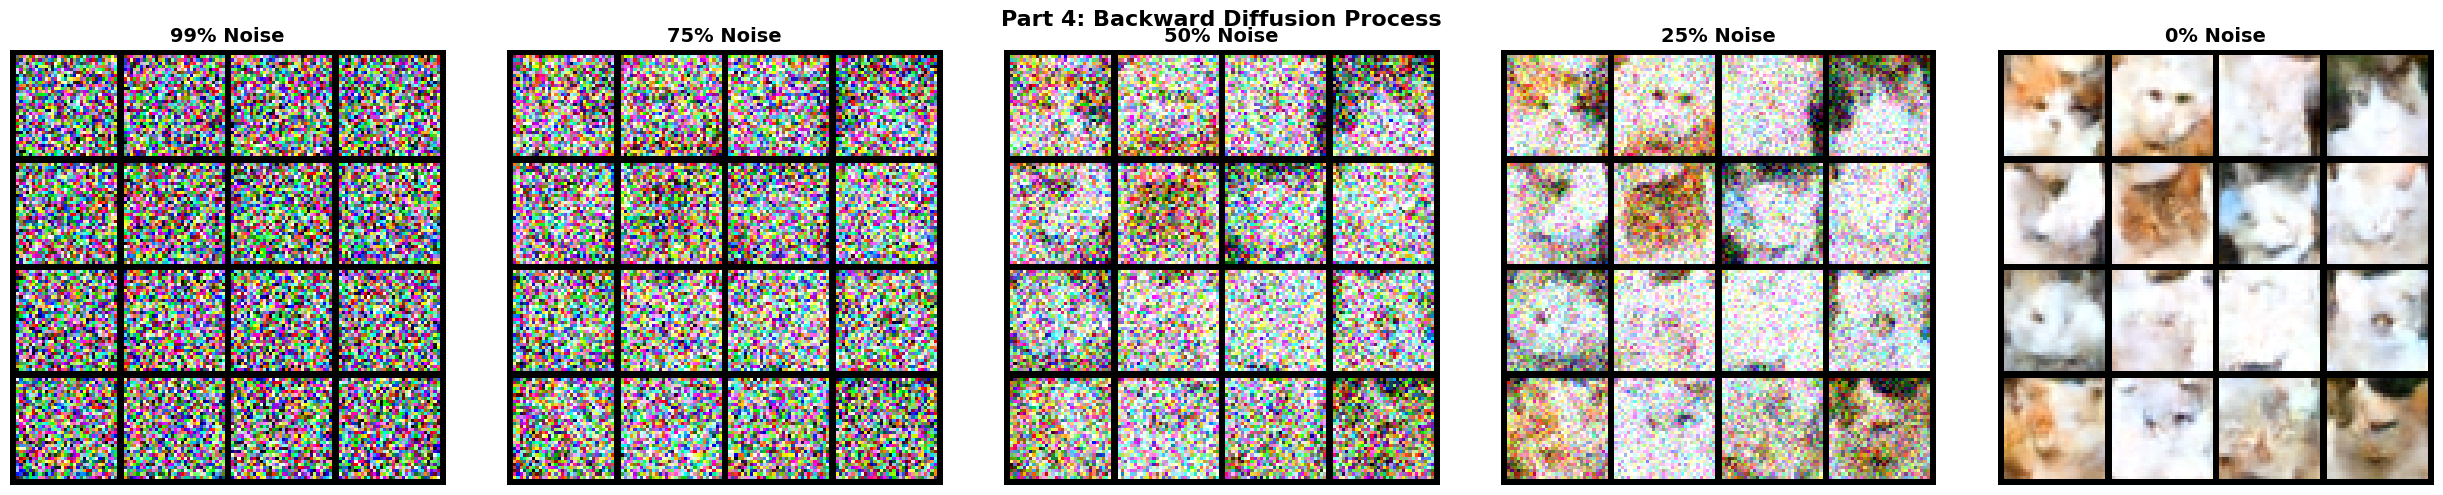


 SUBMISSION FILES READY:
   - part3_forward_diffusion_SUBMISSION.png
   - part4_backward_diffusion_SUBMISSION.png


In [41]:
# PART 3 & 4: Forward and Backward Diffusion Visualization (FINAL SUBMISSION)
import subprocess
import sys
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

print("🚀 Running Parts 3 & 4 with trained model...")
print("=" * 60)

process = subprocess.Popen(
    [sys.executable, '-u', 'main.py',
     '--data_path', './data/train',
     '--load_path', './part2_train_with_fid/model.pt',  # Your trained model
     '--save_folder', './part3_part4_submission',
     '--data_class', 'cat',
     '--time_steps', '50',      # Match Part 2
     '--image_size', '32',       # Match Part 2
     '--batch_size', '16',
     '--unet_dim', '16',         # Match Part 2
     '--visualize'],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True,
    encoding='utf-8',
    errors='replace'
)

for line in iter(process.stdout.readline, ''):
    if line:
        print(line, end='', flush=True)

return_code = process.wait()
print(f"\n{'PASSED:' if return_code == 0 else 'FAILED:'} Visualization completed")

# Display and save results
if return_code == 0:
    results_folder = Path('./part3_part4_submission')
    
    # Forward Diffusion (Part 3)
    forward_files = sorted(results_folder.glob('forward_diffusion_*.png'))
    if forward_files:
        fig, axes = plt.subplots(1, len(forward_files), figsize=(25, 5))
        if len(forward_files) == 1:
            axes = [axes]
        
        percentages = [0, 25, 50, 75, 99]
        for idx, img_path in enumerate(forward_files):
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f'{percentages[idx]}% Noise', fontsize=14, fontweight='bold')
        
        plt.suptitle('Part 3: Forward Diffusion Process', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('part3_forward_diffusion_SUBMISSION.png', dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()
    
    # Backward Diffusion (Part 4)
    backward_files = sorted(results_folder.glob('backward_diffusion_*.png'))
    if backward_files:
        fig, axes = plt.subplots(1, len(backward_files), figsize=(25, 5))
        if len(backward_files) == 1:
            axes = [axes]
        
        percentages_backward = [99, 75, 50, 25, 0]
        for idx, img_path in enumerate(backward_files):
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f'{percentages_backward[idx]}% Noise', fontsize=14, fontweight='bold')
        
        plt.suptitle('Part 4: Backward Diffusion Process', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('part4_backward_diffusion_SUBMISSION.png', dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()
    
    print("\n SUBMISSION FILES READY:")
    print("   - part3_forward_diffusion_SUBMISSION.png")
    print("   - part4_backward_diffusion_SUBMISSION.png")

In [42]:
# ORIGINAL
# # Train the model: If you use colab to train the model, the training process will probably take 2 hours.
# !python main.py \
#     --data_path ./data/train \
#     --save_folder path_to_save_folder \
#     --time_steps 50 \
#     --train_steps 10000 \
#     --image_size 32 \
#     --batch_size 32 \
#     --learning_rate 1e-3 \
#     --unet_dim 16

In [43]:
# ORIGINAL
# # Visualize the forward and backward process
# !python main.py \
#     --data_path ./data/train/ \
#     --load_path path_to_saved_model \
#     --save_folder path_to_save_folder \
#     --time_steps 50 \
#     --train_steps 10000 \
#     --image_size 32 \
#     --batch_size 32 \
#     --learning_rate 1e-3 \
#     --unet_dim 16 \
#     --visualize